In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras


In [ ]:
# load other msg dataset
size = 3000
df= pd.read_csv("spam.csv",sep=',', encoding='latin-1')
normalmsgText = df['v2'].head(size).dropna().values.tolist()
normal_y = [0] * len(normalmsgText)

In [ ]:
# load bank sms dataset
bankdf= pd.read_excel( "BankSMS.xlsx")
bankdf = bankdf.drop(0)
banksTexts = bankdf["Unnamed: 5"].dropna().values.tolist()
bank_y = [1] * len(banksTexts)

In [ ]:

# combine two datasets
sentences = banksTexts + normalmsgText

# Create the labels
y = bank_y + normal_y

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# tokenize the dataset

tokenizer = Tokenizer(num_words = 100, oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(sentences)

X = pad_sequences(sequences,padding= 'post', maxlen=50)

print("\nSequences = " , sequences)
print("\nPadded Sequences:\n")

print("Post Padding:\n",X)




Sequences =  [[54, 1, 14, 1, 15, 17, 5, 25, 13, 1, 45, 46, 14, 1, 1, 39, 2, 7, 52, 10, 53], [54, 1, 14, 1, 15, 17, 5, 25, 13, 1, 45, 46, 14, 1, 1, 39, 2, 7, 52, 10, 53], [54, 1, 14, 1, 15, 17, 5, 25, 13, 1, 45, 46, 14, 1, 1, 39, 2, 7, 52, 10, 53], [54, 1, 14, 1, 15, 17, 5, 25, 13, 1, 45, 46, 14, 1, 1, 39, 2, 7, 52, 10, 53], [54, 1, 14, 1, 15, 17, 5, 25, 13, 1, 45, 46, 14, 1, 1, 39, 2, 7, 52, 10, 53], [1, 1, 14, 1, 15, 17, 5, 25, 13, 1, 45, 46, 14, 1, 1, 39, 2, 7, 52, 10, 53], [54, 1, 14, 1, 15, 17, 5, 25, 13, 1, 45, 46, 14, 1, 1, 39, 2, 7, 52, 10, 53], [54, 1, 14, 1, 15, 17, 5, 25, 13, 1, 45, 46, 14, 1, 1, 39, 2, 7, 52, 10, 53], [54, 1, 14, 1, 15, 17, 5, 25, 13, 1, 45, 46, 14, 1, 1, 39, 2, 7, 52, 10, 53], [67, 54, 43, 14, 1, 1, 17, 5, 25, 13, 1, 45, 46, 14, 1, 1, 39, 2, 7, 52, 10, 53], [67, 54, 43, 14, 1, 15, 17, 5, 25, 13, 1, 45, 46, 14, 1, 1, 39, 2, 7, 52, 10, 53], [54, 1, 14, 1, 15, 17, 5, 25, 13, 1, 45, 46, 14, 1, 1, 39, 2, 7, 52, 10, 53], [54, 1, 14, 1, 15, 17, 5, 25, 13, 1, 45, 

In [ ]:
# split dataset into train and test

from sklearn.model_selection import train_test_split
X = np.array(X)
y = np.array(y)
train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size=0.2)

In [ ]:
# neural network model creation

vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          160000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# model trainig to 50 epochs

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(train_data,train_labels,epochs=50,batch_size=256,validation_data=(test_data, test_labels))

Epoch 1/50
11/11 [==============================] - 1s 27ms/step - loss: 0.6792 - accuracy: 0.8354 - val_loss: 0.6656 - val_accuracy: 0.8545
Epoch 2/50
11/11 [==============================] - 0s 9ms/step - loss: 0.6510 - accuracy: 0.8671 - val_loss: 0.6359 - val_accuracy: 0.8545
Epoch 3/50
11/11 [==============================] - 0s 10ms/step - loss: 0.6189 - accuracy: 0.8671 - val_loss: 0.6030 - val_accuracy: 0.8545
Epoch 4/50
11/11 [==============================] - 0s 10ms/step - loss: 0.5836 - accuracy: 0.8671 - val_loss: 0.5672 - val_accuracy: 0.8545
Epoch 5/50
11/11 [==============================] - 0s 11ms/step - loss: 0.5448 - accuracy: 0.8671 - val_loss: 0.5287 - val_accuracy: 0.8545
Epoch 6/50
11/11 [==============================] - 0s 12ms/step - loss: 0.5038 - accuracy: 0.8671 - val_loss: 0.4879 - val_accuracy: 0.8545
Epoch 7/50
11/11 [==============================] - 0s 11ms/step - loss: 0.4610 - accuracy: 0.8671 - val_loss: 0.4471 - val_accuracy: 0.8545
Epoch 8/50
11/

In [ ]:
msgToPredict = "HNB SMS ALERT: PURCHASE, Debit account:65465464654,Location:gdfghj hfgh fg, LK,Amount(Approx.):544574.321 LKR,Av.Bal:101534.94 LKR,Date:hfh,Time:13:21, Hot Line:645645645645"

sequences = tokenizer.texts_to_sequences([msgToPredict])
preproccedmsg = pad_sequences(sequences,padding= 'post', maxlen=50)
model.predict(preproccedmsg)

1/1 [==============================] - 0s 84ms/step


array([[0.9824645]], dtype=float32)

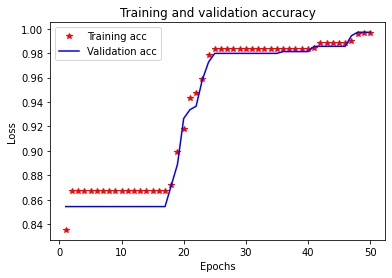

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r*', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
# saving the model to a file
model.save('smsmodel.h5')